<a href="https://colab.research.google.com/github/shydaparveen/applied-machine-learning-AML-/blob/main/Retail_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('/content/Retail_Transactions_2000.csv - Retail_Transactions_2000.csv.csv')

In [3]:
print('Shape:',df.shape)

Shape: (2000, 11)


In [4]:
print('\nColumns:', df.columns.to_list())


Columns: ['TransactionID', 'CustomerID', 'Gender', 'Age', 'City', 'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode', 'TotalAmount']


In [5]:
print('\nInfo:')


Info:


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB
None


In [6]:
print('\nMissing values (count):')


Missing values (count):


In [7]:
print(df.isna().sum())

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64


In [8]:
print(df.isna().sum())

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64


In [9]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [10]:
df.columns = df.columns.str.strip()

In [11]:
df = df.drop_duplicates()

In [12]:
def clean_text(s):
  if pd.isna(s):
    return s
    return str(s).strip().title()

In [13]:
for col in ["Gender", "City", "ProductCategory", "PaymentMode"]:
  if col in df.columns:
    df[col] = df[col].apply(clean_text)

In [14]:
gender_map = {
    "M": "Male", "Male": "Male",
    "F": "Female", "Female": "Female",
    "O": "Other", "Others": "Other", "Other": "Other"
}
if "Gender" in df.columns:
  df["Gender"] = df["Gender"].map(lambda x: gender_map.get(x, x))

In [15]:
critical_cols = [c for c in ["TransactionID", "ProductCategory"] if c in df.columns]
df = df.dropna(subset=critical_cols)


In [16]:
if "Age" in df.columns:
  df["Age"] = pd.to_numeric (df["Age"], errors = "coerce")

In [17]:
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())

In [18]:
if "City" in df.columns and not df["City"].dropna().empty:
    mode_city = df["City"].mode().iloc[0]
    df.loc[:, "City"] = df["City"].fillna(mode_city)


In [19]:
for col in ["Quantity", "Price"]:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df.loc[(df[col].isna()) | (df[col] <= 0), col] = np.nan

In [20]:
need_cols = [c for c in ["Quantity", "Price"] if c in df.columns]
if need_cols:
  df = df.dropna(subset=need_cols)

In [21]:
if set(["Quantity", "Price"]).issubset(df.columns): df["TotalAmount"] = df["Quantity"] * df["Price"]

In [22]:
if "PurchaseDate" in df.columns:

    df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"], errors="coerce")


    df = df.dropna(subset=["PurchaseDate"])


    df["Month"] = df["PurchaseDate"].dt.to_period("M").astype(str)
    df["DayOfWeek"] = df["PurchaseDate"].dt.day_name()


In [23]:
if "Age" in df.columns:
    bins = [0, 17, 25, 40, 60, 200]
    labels = ["Under 18", "18-25", "26-40", "41-60", "60+"]
    df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)


In [24]:
cat_cols = [c for c in ["Gender", "City", "ProductCategory", "PaymentMode"] if c in df.columns]
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [25]:
from sklearn.preprocessing import StandardScaler

num_cols = [c for c in ["Age", "Price", "TotalAmount"] if c in df.columns]
scaler = StandardScaler()

if num_cols and len(df) > 0:
    scaled = scaler.fit_transform(df[num_cols])
    for i, col in enumerate(num_cols):
        df[f"{col}_scaled"] = scaled[:, i]




In [26]:
print("\nAny missing left? (top 10 columns)")
print(df.isna().sum().sort_values(ascending=False).head(10))
print("\nSample rows:")
print(df.head())


Any missing left? (top 10 columns)
TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
dtype: int64

Sample rows:
Empty DataFrame
Columns: [TransactionID, CustomerID, Gender, Age, City, ProductCategory, Quantity, Price, PurchaseDate, PaymentMode, TotalAmount, Month, DayOfWeek, AgeGroup]
Index: []


In [27]:
df.to_csv("Retail_Cleaned.csv", index=False)
df_encoded.to_csv("Retail_Cleaned_Encoded.csv", index=False)

In [28]:
print("\nSaved: Retail_Cleaned.csv, Retail_Cleaned_Encoded.csv")


Saved: Retail_Cleaned.csv, Retail_Cleaned_Encoded.csv


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [31]:
df=pd.read_csv("/content/Retail_Transactions_2000.csv - Retail_Transactions_2000.csv.csv")

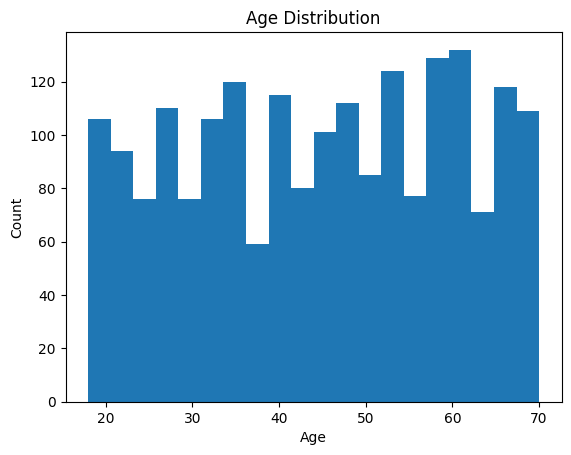

In [32]:
if "Age" in df.columns:
  plt.figure()
  df["Age"].plot(kind="hist", bins=20)
  plt.title("Age Distribution")
  plt.xlabel("Age")
  plt.ylabel("Count")
  plt.show()

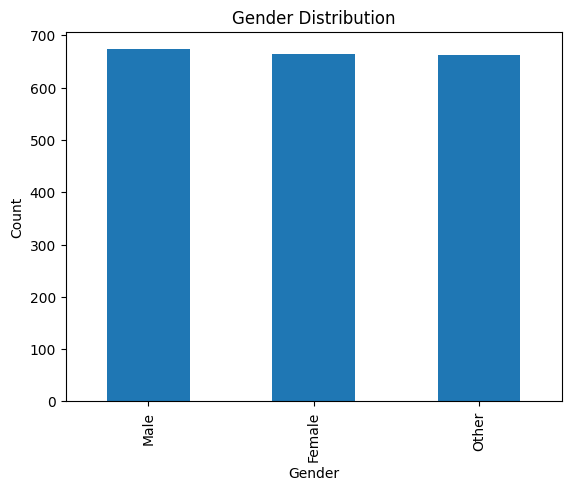

In [33]:
if "Gender" in df.columns: plt.figure()
df["Gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

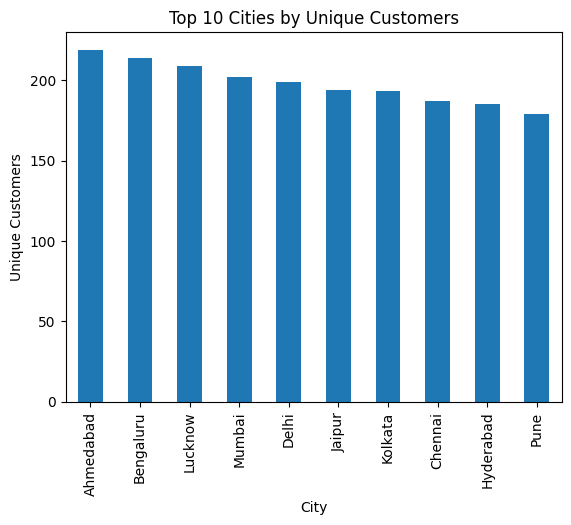

In [34]:
if set(["CustomerID", "City"]).issubset(df.columns):
  top_cities = (df.groupby("City")["CustomerID"].nunique()
  .sort_values(ascending=False)
  .head(10))
  plt.figure()
  top_cities.plot(kind="bar")
  plt.title("Top 10 Cities by Unique Customers")
  plt.xlabel("City")
  plt.ylabel("Unique Customers")
  plt.show()

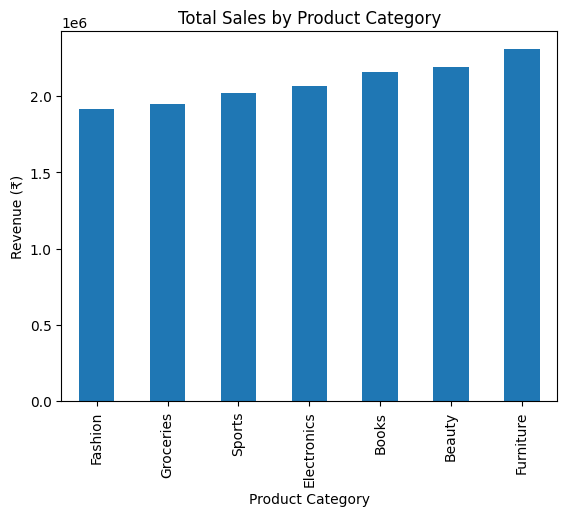

In [39]:
if set(["ProductCategory", "TotalAmount"]).issubset(df.columns):
  cat_sales = df.groupby("ProductCategory")["TotalAmount"].sum().sort_values()
  plt.figure()
  cat_sales.plot(kind="bar")
  plt.title("Total Sales by Product Category")
  plt.xlabel("Product Category")
  plt.ylabel("Revenue (₹)")
  plt.show()

In [40]:
if set(["Month", "TotalAmount"]).issubset(df.columns):
  monthly = df.groupby("Month")["TotalAmount"].sum().sort_index()
  plt.figure()
  monthly.plot(kind="line", marker="o")
  plt.title("Monthly Sales Trend")
  plt.xlabel("Month")
  plt.ylabel("Revenue (₹)")
  plt.xticks(rotation=45)
  plt.tight_layout()
plt.show()

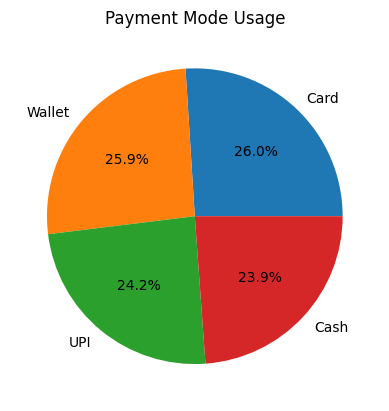

In [41]:
if "PaymentMode" in df.columns:
  pm_counts = df["PaymentMode"].value_counts()
  plt.figure()
  pm_counts.plot(kind="pie", autopct="%1.1f%%")
  plt.title("Payment Mode Usage")
  plt.ylabel("")
plt.show()

In [45]:
if set(["CustomerID", "AgeGroup", "TotalAmount"]).issubset(df.columns):
    spend_by_age = (
        df.groupby(["CustomerID", "AgeGroup"])["TotalAmount"]
          .sum()
          .reset_index()
          .groupby("AgeGroup")["TotalAmount"]
          .mean()
          .reindex(["Under 18", "18-25", "26-40", "41-60", "60+"])
    )

    plt.figure()
    spend_by_age.plot(kind="bar")
    plt.title("Average Spend per Customer by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Avg Spend (₹)")
    plt.show()


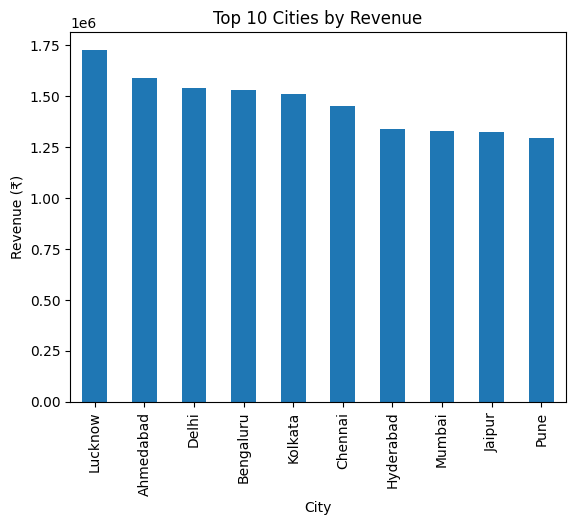

In [47]:
if set(["City", "TotalAmount"]).issubset(df.columns):
  city_rev = df.groupby("City")["TotalAmount"].sum().sort_values(ascending=False)
  plt.figure()
  city_rev.plot(kind="bar")
  plt.title("Top 10 Cities by Revenue")
  plt.xlabel("City")
  plt.ylabel("Revenue (₹)")
  plt.show()

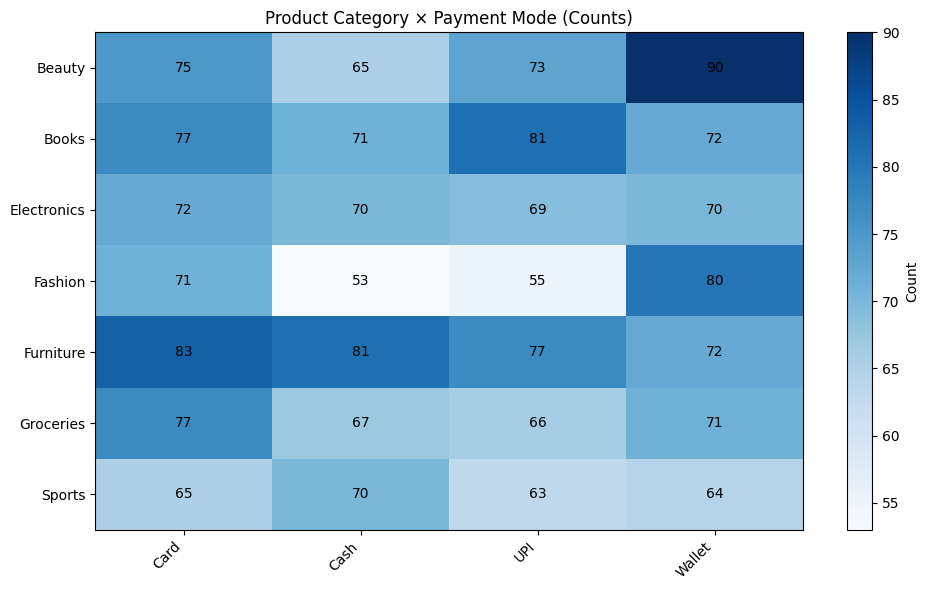

In [48]:
if set(["ProductCategory", "PaymentMode"]).issubset(df.columns):
    cross = df.pivot_table(
        index="ProductCategory",
        columns="PaymentMode",
        values="TransactionID",
        aggfunc="count",
        fill_value=0
    )

    plt.figure(figsize=(10, 6))
    plt.imshow(cross.values, aspect="auto", cmap="Blues")

    plt.title("Product Category × Payment Mode (Counts)")
    plt.xticks(
        ticks=range(len(cross.columns)),
        labels=cross.columns,
        rotation=45,
        ha="right"
    )
    plt.yticks(
        ticks=range(len(cross.index)),
        labels=cross.index
    )

    # Annotate cells with counts
    for i in range(cross.shape[0]):
        for j in range(cross.shape[1]):
            plt.text(
                j, i, int(cross.values[i, j]),
                ha="center", va="center", color="black"
            )

    plt.colorbar(label="Count")
    plt.tight_layout()
    plt.show()


In [49]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>